### Educational Attainment for the Population 25 Years Old and Over in Inglewood, CA 
#### 2019 American Community Survey 5 Year
###### By Luis Daniel Cruz [Working towards collaborative project w/ Nelson Guevara]

The data being analyzed in this notebook looks at the educational attainment within the city of Inglewood, CA for respondents 25 years and older. It uses data collected from the 2019 American Community Survey and sorts the data through designated CENSUS tract within the city. 

# First things first, get your data and your tools!

In [1]:
import pandas as pd

In [2]:
import geopandas as gpd

In [3]:
import contextily as ctx

In [4]:
import matplotlib.pyplot as plt 

In [5]:
educ = gpd.read_file('data /acs2019_5yr_B15003_14000US06037601212.geojson')

We begin by uploading and preparing our notebook. 

It is said to be good practice to pull up all of our "libraries" and "modules" upfront. 

We also want to load our data and make sure that the data path being called is correct, as to avoid any issues.

I have named my data "educ" in honor of our previous STATS Professor - Doctor Loya, who drilled the variable in our heads when we were learning to use STATA.

# Preliminary Inspection 

Lets look at what our raw data is so far. 

In [6]:
educ.shape

(32, 53)

As a preliminary inspection - we can see that our imported raw data is composed of 32 rows and 52 columns.

We want to check to see if any of the rows in our data include a total row, which adds up all of the data in the other rows and displays it for us as a row. It is usually located at the first row, number 0 - but my classmate mentioned that his was populated as the last row within his raw data. So lets check!

In [8]:
educ.head()
# this command shows me the first five 
# rows of my data - but I dont appear to see any totals... 
# thank you, next.

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",1857.0,172.0,51.0,29.0,0.0,12.0,0.0,12.0,...,56.0,324.0,86.0,116.0,57.0,6.0,8.0,21.0,22.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264..."
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",1580.0,191.0,94.0,58.0,0.0,12.0,0.0,12.0,...,71.0,298.0,126.0,47.0,28.0,13.0,13.0,26.0,32.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373..."
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",1910.0,134.0,72.0,35.0,0.0,12.0,5.0,9.0,...,63.0,351.0,92.0,181.0,60.0,0.0,12.0,22.0,18.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264..."
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",1437.0,173.0,82.0,42.0,0.0,12.0,0.0,12.0,...,43.0,76.0,39.0,51.0,54.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351..."
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",3227.0,363.0,133.0,149.0,8.0,12.0,0.0,12.0,...,110.0,503.0,140.0,368.0,164.0,59.0,52.0,38.0,30.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439..."


In [9]:
educ.tail()
# this command shows me the last five 
# rows of my data - but I dont appear to see any totals here either -
# thank you, next.

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",...,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
27,14000US06037601900,"Census Tract 6019, Los Angeles, CA",2787.0,278.0,194.0,111.0,0.0,12.0,0.0,12.0,...,100.0,111.0,72.0,46.0,54.0,0.0,12.0,2.0,9.0,"MULTIPOLYGON (((-118.34391 33.94545, -118.3434..."
28,14000US06037602003,"Census Tract 6020.03, Los Angeles, CA",3081.0,294.0,167.0,95.0,0.0,12.0,0.0,12.0,...,79.0,228.0,102.0,72.0,64.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.34390 33.93581, -118.3439..."
29,14000US06037602004,"Census Tract 6020.04, Los Angeles, CA",2360.0,257.0,124.0,63.0,0.0,12.0,7.0,11.0,...,69.0,190.0,87.0,39.0,33.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.33514 33.93102, -118.3351..."
30,14000US06037602104,"Census Tract 6021.04, Los Angeles, CA",3708.0,397.0,158.0,97.0,0.0,17.0,0.0,17.0,...,145.0,182.0,88.0,54.0,39.0,26.0,35.0,10.0,16.0,"MULTIPOLYGON (((-118.35247 33.93006, -118.3524..."
31,14000US06037703002,"Census Tract 7030.02, Los Angeles, CA",5161.0,448.0,40.0,45.0,2.0,12.0,0.0,17.0,...,167.0,1401.0,261.0,969.0,312.0,328.0,151.0,238.0,122.0,"MULTIPOLYGON (((-118.38655 33.97716, -118.3862..."


## Lets try one more thing -

My classmate reminded me of this command as an option when working with data, its less messy than the previous 2 and I appreciate its direct display. 

For this command - all we see are the FIPS codes of each row - the data appears consistent all throughout, so it appears that the total row never made it. Which is cool 'cause I dont think we need it. Plus, I think the total only appears when working with overall county data.

In [10]:
educ.geoid.head()

0    14000US06037600501
1    14000US06037600502
2    14000US06037600601
3    14000US06037600602
4    14000US06037600702
Name: geoid, dtype: object

In [11]:
educ.geoid.tail()

27    14000US06037601900
28    14000US06037602003
29    14000US06037602004
30    14000US06037602104
31    14000US06037703002
Name: geoid, dtype: object

In [12]:
# it is essentially showing us again the first and last 5 rows of our data...
# but it does not include the columns. GOOD! 'cause i dont need them rn. 

### Lets plot what we have thus far.

<AxesSubplot:>

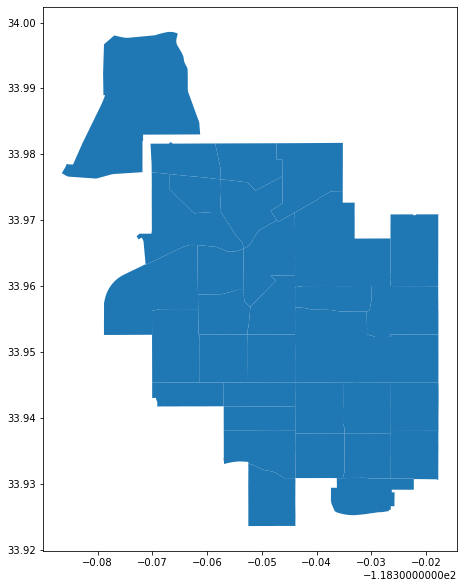

In [13]:
educ.plot(figsize=(10,10))

Produced above now is a plot of the census tracts in the city of Inglewood.



We are aware of that odd divide  at the upper left hand corner and will be looking deeper in to the reason for such an odd divide as we continue on to our research.

In [17]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


# right here, we are telling python top show us one row with all the columns
# within our data file.

In [18]:
educ.sample()

,geoid,name,B15003001,"B15003001, Error",B15003002,"B15003002, Error",B15003003,"B15003003, Error",B15003004,"B15003004, Error",B15003005,"B15003005, Error",B15003006,"B15003006, Error",B15003007,"B15003007, Error",B15003008,"B15003008, Error",B15003009,"B15003009, Error",B15003010,"B15003010, Error",B15003011,"B15003011, Error",B15003012,"B15003012, Error",B15003013,"B15003013, Error",B15003014,"B15003014, Error",B15003015,"B15003015, Error",B15003016,"B15003016, Error",B15003017,"B15003017, Error",B15003018,"B15003018, Error",B15003019,"B15003019, Error",B15003020,"B15003020, Error",B15003021,"B15003021, Error",B15003022,"B15003022, Error",B15003023,"B15003023, Error",B15003024,"B15003024, Error",B15003025,"B15003025, Error",geometry
16,14000US06037601211,"Census Tract 6012.11, Los Angeles, CA",1785.0,192.0,63.0,37.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,24.0,24.0,0.0,12.0,82.0,46.0,4.0,8.0,21.0,25.0,44.0,37.0,43.0,40.0,14.0,17.0,92.0,66.0,419.0,117.0,60.0,37.0,77.0,47.0,362.0,138.0,115.0,59.0,288.0,102.0,24.0,18.0,12.0,20.0,41.0,35.0,"MULTIPOLYGON (((-118.36177 33.96619, -118.3617..."


In [19]:
# this is what it looks like - notice the error columns, we wont be needing those..

## Lets drop some columns

I am dropping whatever I don't need - I looked at the Meta Data in the Jason filen and all of my columns appear to have important information for my analysis thus far. The only columns I am dropping are the ones with an 'Error' Label.


In [20]:
list(educ)

['geoid',
 'name',
 'B15003001',
 'B15003001, Error',
 'B15003002',
 'B15003002, Error',
 'B15003003',
 'B15003003, Error',
 'B15003004',
 'B15003004, Error',
 'B15003005',
 'B15003005, Error',
 'B15003006',
 'B15003006, Error',
 'B15003007',
 'B15003007, Error',
 'B15003008',
 'B15003008, Error',
 'B15003009',
 'B15003009, Error',
 'B15003010',
 'B15003010, Error',
 'B15003011',
 'B15003011, Error',
 'B15003012',
 'B15003012, Error',
 'B15003013',
 'B15003013, Error',
 'B15003014',
 'B15003014, Error',
 'B15003015',
 'B15003015, Error',
 'B15003016',
 'B15003016, Error',
 'B15003017',
 'B15003017, Error',
 'B15003018',
 'B15003018, Error',
 'B15003019',
 'B15003019, Error',
 'B15003020',
 'B15003020, Error',
 'B15003021',
 'B15003021, Error',
 'B15003022',
 'B15003022, Error',
 'B15003023',
 'B15003023, Error',
 'B15003024',
 'B15003024, Error',
 'B15003025',
 'B15003025, Error',
 'geometry']

In [21]:
columns_to_keep = ['geoid',
 'name',
 'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']

I will be accounting for all of the categories provided within the data until I can figure out how to create buckets to group certain categories together but still account for all the data. For example - if I want a category column only showing the amount of people with less than a high school education I would have to add up the people who only went up to 1st grade, 2nd grade, 3rd grade, and so on... but didnt graduate high school or earn an alternative credential.

In [22]:
educ = educ[columns_to_keep]

^this command has now updated and redefined my educ variable to hold on and use only the columns I asked it to. This is what it looks like as an output now:

In [23]:
educ.head()
# when you scroll horizontally now, you are able to see less columns now.

,geoid,name,B15003001,B15003002,B15003003,B15003004,B15003005,B15003006,B15003007,B15003008,B15003009,B15003010,B15003011,B15003012,B15003013,B15003014,B15003015,B15003016,B15003017,B15003018,B15003019,B15003020,B15003021,B15003022,B15003023,B15003024,B15003025,geometry
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",1857.0,51.0,0.0,0.0,0.0,4.0,0.0,0.0,20.0,19.0,6.0,0.0,5.0,22.0,26.0,40.0,377.0,17.0,112.0,504.0,187.0,324.0,116.0,6.0,21.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264..."
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",1580.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,59.0,0.0,37.0,64.0,0.0,21.0,30.0,326.0,38.0,61.0,266.0,159.0,298.0,47.0,13.0,26.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373..."
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",1910.0,72.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,43.0,0.0,6.0,31.0,53.0,388.0,28.0,116.0,433.0,155.0,351.0,181.0,0.0,22.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264..."
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",1437.0,82.0,0.0,0.0,0.0,0.0,28.0,15.0,7.0,64.0,10.0,46.0,65.0,31.0,29.0,15.0,463.0,20.0,97.0,243.0,95.0,76.0,51.0,0.0,0.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351..."
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",3227.0,133.0,8.0,0.0,0.0,0.0,0.0,23.0,36.0,48.0,0.0,0.0,0.0,0.0,41.0,83.0,644.0,86.0,305.0,621.0,231.0,503.0,368.0,59.0,38.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439..."


# Renaming the Columns 

Lets change the labels so we know what we are looking at instead of just trying to guess what all those codes mean.

In [24]:
## First we need to create a list of the column names as they are now.
list(educ)

['geoid',
 'name',
 'B15003001',
 'B15003002',
 'B15003003',
 'B15003004',
 'B15003005',
 'B15003006',
 'B15003007',
 'B15003008',
 'B15003009',
 'B15003010',
 'B15003011',
 'B15003012',
 'B15003013',
 'B15003014',
 'B15003015',
 'B15003016',
 'B15003017',
 'B15003018',
 'B15003019',
 'B15003020',
 'B15003021',
 'B15003022',
 'B15003023',
 'B15003024',
 'B15003025',
 'geometry']

Now - using Jasons Metadata, we can find their name/label. 

In [25]:
educ.columns = ['geoid',
 'name',
 'Total',
 'No Schooling Completed',                
 'Nursery School',
 'Kindergarten',
 '1st Grade',            
 '2nd Grade',
 '3rd Grade',
 '4th Grade',
 '5th Grade',           
 '6th Grade',
 '7th Grade',
 '8th Grade',
 '9th Grade',           
 '10th Grade',
 '11th Grade',           
 '12th Grade, No Diploma',
 'Regular High School Diploma',
 'GED or Alternative Credential',
 'Some College, Less than 1 year',            
 'Some College, 1 or more years, No Degree',                      
 'Associates Degree',
 'Bachelors Degree',
 'Masters Degree',
 'Professional School Degree',           
 'Doctorate Degree',
 'geometry']

In [26]:
educ.head()

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",1857.0,51.0,0.0,0.0,0.0,4.0,0.0,0.0,20.0,19.0,6.0,0.0,5.0,22.0,26.0,40.0,377.0,17.0,112.0,504.0,187.0,324.0,116.0,6.0,21.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264..."
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",1580.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,59.0,0.0,37.0,64.0,0.0,21.0,30.0,326.0,38.0,61.0,266.0,159.0,298.0,47.0,13.0,26.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373..."
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",1910.0,72.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,43.0,0.0,6.0,31.0,53.0,388.0,28.0,116.0,433.0,155.0,351.0,181.0,0.0,22.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264..."
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",1437.0,82.0,0.0,0.0,0.0,0.0,28.0,15.0,7.0,64.0,10.0,46.0,65.0,31.0,29.0,15.0,463.0,20.0,97.0,243.0,95.0,76.0,51.0,0.0,0.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351..."
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",3227.0,133.0,8.0,0.0,0.0,0.0,0.0,23.0,36.0,48.0,0.0,0.0,0.0,0.0,41.0,83.0,644.0,86.0,305.0,621.0,231.0,503.0,368.0,59.0,38.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439..."


Now all of our column titles are on their and we can kind of begin to understand the data being presented to us. 

# Data Integrity 
##### Lets make sure our numbers add up though. 

In [27]:
random_tract = educ.sample()

In [28]:
random_tract

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry
16,14000US06037601211,"Census Tract 6012.11, Los Angeles, CA",1785.0,63.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,82.0,4.0,21.0,44.0,43.0,14.0,92.0,419.0,60.0,77.0,362.0,115.0,288.0,24.0,12.0,41.0,"MULTIPOLYGON (((-118.36177 33.96619, -118.3617..."


In [29]:
random_tract.iloc[0]['Total']

1785.0

In [30]:
print('Total population: ' + str(random_tract.iloc[0]['Total']))

Total population: 1785.0


In [31]:
print(random_tract.iloc[0]['No Schooling Completed'] + 
      random_tract.iloc[0]['Nursery School'] + 
      random_tract.iloc[0]['Kindergarten'] + 
      random_tract.iloc[0]['1st Grade'] + 
      random_tract.iloc[0]['2nd Grade'] + 
      random_tract.iloc[0]['3rd Grade'] + 
      random_tract.iloc[0]['4th Grade'] + 
      random_tract.iloc[0]['5th Grade'] + 
      random_tract.iloc[0]['6th Grade'] + 
      random_tract.iloc[0]['7th Grade'] + 
      random_tract.iloc[0]['8th Grade'] + 
      random_tract.iloc[0]['9th Grade'] + 
      random_tract.iloc[0]['10th Grade'] + 
      random_tract.iloc[0]['11th Grade'] + 
      random_tract.iloc[0]['12th Grade, No Diploma'] + 
      random_tract.iloc[0]['Regular High School Diploma'] + 
      random_tract.iloc[0]['GED or Alternative Credential'] + 
      random_tract.iloc[0]['Some College, Less than 1 year'] + 
      random_tract.iloc[0]['Some College, 1 or more years, No Degree'] + 
      random_tract.iloc[0]['Associates Degree'] +
      random_tract.iloc[0]['Bachelors Degree'] + 
      random_tract.iloc[0]['Masters Degree'] + 
      random_tract.iloc[0]['Professional School Degree'] +
       random_tract.iloc[0]['Doctorate Degree'])

1785.0


The math checks out - when you add the data from each column and compare it to the number under the total column they are the same.

In [34]:
educ['Bachelors Degree'].mean()

401.28125

the average number of people with a Bachelors degree in any given tract is 401

<AxesSubplot:ylabel='Frequency'>

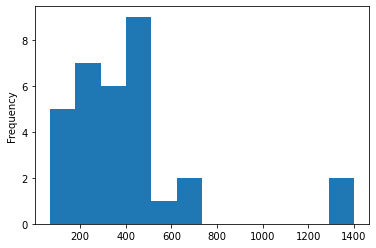

In [35]:
educ['Bachelors Degree'].plot.hist(bins=12)

Using 12 bins, I plotted the amount of people with a Bachelors Degree in the city of Inglewood. The frequency shows the number of tracts that hold that quantity.

# Sorting - 
Sorting the data might be more useful

In [36]:
educ_sorted = educ.sort_values(by='Total',ascending = False)

In [37]:
educ_sorted[['geoid','Total']].head(10)

,geoid,Total
31,14000US06037703002,5161.0
19,14000US06037601302,4546.0
21,14000US06037601401,4282.0
14,14000US06037601100,4264.0
9,14000US06037600902,4233.0
17,14000US06037601212,4004.0
30,14000US06037602104,3708.0
11,14000US06037600912,3631.0
20,14000US06037601303,3378.0
13,14000US06037601002,3237.0


Lets look at them on a map now. 

<AxesSubplot:>

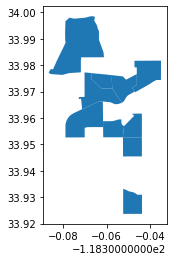

In [38]:
educ_sorted.head(10).plot()

although this is cool - I dont know which one out of these 10 tracts is thee most populated... lets try using some color. 

<AxesSubplot:>

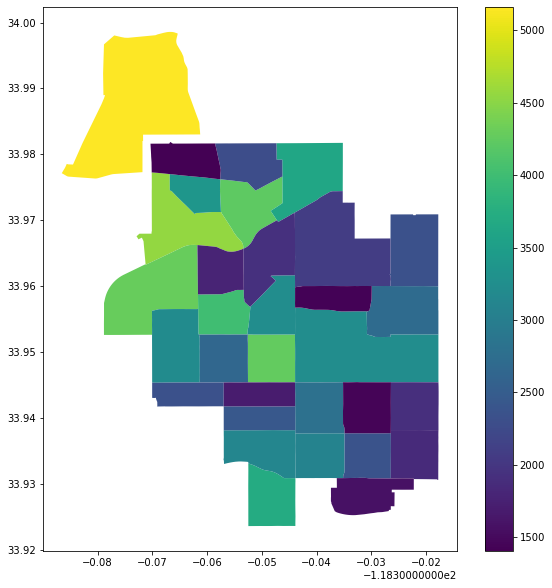

In [39]:
educ_sorted.head(100).plot(figsize=(10,10),column='Total',legend=True)

now we can clearly see the range in population by census tracts thanks to the color scale.

##### That was cool but lets dig a little deeper in to our data. 

# Filtering & Subsetting 

In [40]:
educ[educ['Total']==0]

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry


In this commmand - we asked to see a row with a population equal to zero - meaning: Which CENSUS tract contains a total of 0? And the maching said: NONE. (THEY ALL HAVE SOMETHING)

In [41]:
educ_sorted[['geoid','Total']].tail(10)

,geoid,Total
8,14000US06037600802,2067.0
12,14000US06037601001,1931.0
2,14000US06037600601,1910.0
0,14000US06037600501,1857.0
16,14000US06037601211,1785.0
25,14000US06037601801,1689.0
1,14000US06037600502,1580.0
3,14000US06037600602,1437.0
5,14000US06037600703,1421.0
18,14000US06037601301,1404.0


We know by our sorting abilities, that the census tract with the least amount of people who responded is located in row 8 with a total of 2,067.

Well cool - we know how many people ages 25 & over are in each census tract and the amount of education within each tract. But if we want to understand the scale of differences or similarities between each census tract, we have to even the playing field. We gotta set a scale. Not sure exactly the word, but in GIS we can it NORMALIZING THE DATA.

In [42]:
list(educ)

['geoid',
 'name',
 'Total',
 'No Schooling Completed',
 'Nursery School',
 'Kindergarten',
 '1st Grade',
 '2nd Grade',
 '3rd Grade',
 '4th Grade',
 '5th Grade',
 '6th Grade',
 '7th Grade',
 '8th Grade',
 '9th Grade',
 '10th Grade',
 '11th Grade',
 '12th Grade, No Diploma',
 'Regular High School Diploma',
 'GED or Alternative Credential',
 'Some College, Less than 1 year',
 'Some College, 1 or more years, No Degree',
 'Associates Degree',
 'Bachelors Degree',
 'Masters Degree',
 'Professional School Degree',
 'Doctorate Degree',
 'geometry']

In [44]:
educ['Percent No Schooling Completed'] = educ['No Schooling Completed']/educ['Total']*100

In [45]:
educ['Percent No Schooling Completed'] = educ['No Schooling Completed']/educ['Total']*100

In [46]:
educ['Percent Nursery School'] = educ['Nursery School']/educ['Total']*100 

In [47]:
educ['Percent Kindergarten'] = educ['Kindergarten']/educ['Total']*100 

In [48]:
educ['Percent 1st Grade'] = educ['1st Grade']/educ['Total']*100 

In [49]:
educ['Percent 2nd Grade'] = educ['2nd Grade']/educ['Total']*100 

In [50]:
educ['Percent 3rd Grade'] = educ['3rd Grade']/educ['Total']*100 

In [51]:
educ['Percent 4th Grade'] = educ['4th Grade']/educ['Total']*100 

In [52]:
educ['Percent 5th Grade'] = educ['5th Grade']/educ['Total']*100 

In [53]:
educ['Percent 6th Grade'] = educ['6th Grade']/educ['Total']*100 

In [54]:
educ['Percent 7th Grade'] = educ['7th Grade']/educ['Total']*100 

In [55]:
educ['Percent 8th Grade'] = educ['8th Grade']/educ['Total']*100 

In [56]:
educ['Percent 9th Grade'] = educ['9th Grade']/educ['Total']*100 

In [57]:
educ['Percent 10th Grade'] = educ['10th Grade']/educ['Total']*100 

In [58]:
educ['Percent 11th Grade'] = educ['11th Grade']/educ['Total']*100 

In [59]:
educ['Percent 12th Grade, No Diploma'] = educ['12th Grade, No Diploma']/educ['Total']*100 

In [60]:
educ['Percent Regular High School Diploma'] = educ['Regular High School Diploma']/educ['Total']*100

In [61]:
educ['Percent GED or Alternative Credential'] = educ['GED or Alternative Credential']/educ['Total']*100

In [62]:
educ['Percent Some College, Less than 1 year'] = educ['Some College, Less than 1 year']/educ['Total']*100

In [63]:
educ['Percent Some College, 1 or more years, No Degree'] = educ['Some College, 1 or more years, No Degree']/educ['Total']*100

In [64]:
educ['Percent Associates Degree'] = educ['Associates Degree']/educ['Total']*100
educ['Percent Bachelors Degree'] = educ['Bachelors Degree']/educ['Total']*100 
educ['Percent Masters Degree'] = educ['Masters Degree']/educ['Total']*100 
educ['Percent Professional School Degree'] = educ['Professional School Degree']/educ['Total']*100 
educ['Percent Doctorate Degree'] = educ['Doctorate Degree']/educ['Total']*100 

In [65]:
educ.head ()

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry,Percent No Schooling Completed,Percent Nursery School,Percent Kindergarten,Percent 1st Grade,Percent 2nd Grade,Percent 3rd Grade,Percent 4th Grade,Percent 5th Grade,Percent 6th Grade,Percent 7th Grade,Percent 8th Grade,Percent 9th Grade,Percent 10th Grade,Percent 11th Grade,"Percent 12th Grade, No Diploma",Percent Regular High School Diploma,Percent GED or Alternative Credential,"Percent Some College, Less than 1 year","Percent Some College, 1 or more years, No Degree",Percent Associates Degree,Percent Bachelors Degree,Percent Masters Degree,Percent Professional School Degree,Percent Doctorate Degree
0,14000US06037600501,"Census Tract 6005.01, Los Angeles, CA",1857.0,51.0,0.0,0.0,0.0,4.0,0.0,0.0,20.0,19.0,6.0,0.0,5.0,22.0,26.0,40.0,377.0,17.0,112.0,504.0,187.0,324.0,116.0,6.0,21.0,"MULTIPOLYGON (((-118.32642 33.93293, -118.3264...",2.746365,0.000000,0.00000,0.0,0.215401,0.000000,0.000000,1.077006,1.023156,0.323102,0.000000,0.269251,1.184707,1.400108,2.154012,20.301562,0.915455,6.031233,27.140549,10.070005,17.447496,6.246634,0.323102,1.130856
1,14000US06037600502,"Census Tract 6005.02, Los Angeles, CA",1580.0,94.0,0.0,0.0,0.0,0.0,0.0,0.0,41.0,59.0,0.0,37.0,64.0,0.0,21.0,30.0,326.0,38.0,61.0,266.0,159.0,298.0,47.0,13.0,26.0,"MULTIPOLYGON (((-118.33737 33.92796, -118.3373...",5.949367,0.000000,0.00000,0.0,0.000000,0.000000,0.000000,2.594937,3.734177,0.000000,2.341772,4.050633,0.000000,1.329114,1.898734,20.632911,2.405063,3.860759,16.835443,10.063291,18.860759,2.974684,0.822785,1.645570
2,14000US06037600601,"Census Tract 6006.01, Los Angeles, CA",1910.0,72.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,43.0,0.0,6.0,31.0,53.0,388.0,28.0,116.0,433.0,155.0,351.0,181.0,0.0,22.0,"MULTIPOLYGON (((-118.32641 33.93870, -118.3264...",3.769634,0.000000,0.26178,0.0,0.000000,0.000000,0.000000,0.000000,1.361257,0.000000,2.251309,0.000000,0.314136,1.623037,2.774869,20.314136,1.465969,6.073298,22.670157,8.115183,18.376963,9.476440,0.000000,1.151832
3,14000US06037600602,"Census Tract 6006.02, Los Angeles, CA",1437.0,82.0,0.0,0.0,0.0,0.0,28.0,15.0,7.0,64.0,10.0,46.0,65.0,31.0,29.0,15.0,463.0,20.0,97.0,243.0,95.0,76.0,51.0,0.0,0.0,"MULTIPOLYGON (((-118.33516 33.94108, -118.3351...",5.706333,0.000000,0.00000,0.0,0.000000,1.948504,1.043841,0.487126,4.453723,0.695894,3.201113,4.523312,2.157272,2.018093,1.043841,32.219903,1.391788,6.750174,16.910230,6.610995,5.288796,3.549061,0.000000,0.000000
4,14000US06037600702,"Census Tract 6007.02, Los Angeles, CA",3227.0,133.0,8.0,0.0,0.0,0.0,0.0,23.0,36.0,48.0,0.0,0.0,0.0,0.0,41.0,83.0,644.0,86.0,305.0,621.0,231.0,503.0,368.0,59.0,38.0,"MULTIPOLYGON (((-118.34393 33.95271, -118.3439...",4.121475,0.247908,0.00000,0.0,0.000000,0.000000,0.712736,1.115587,1.487450,0.000000,0.000000,0.000000,0.000000,1.270530,2.572048,19.956616,2.665014,9.451503,19.243880,7.158351,15.587233,11.403781,1.828324,1.177564


OK - NOW WE HAVE CREATED PERCENT COLUMNS. This gives us a better idea of the composition of educational attainment levels within each census tract. 

# Here is a Chloropleth map now. 

<AxesSubplot:>

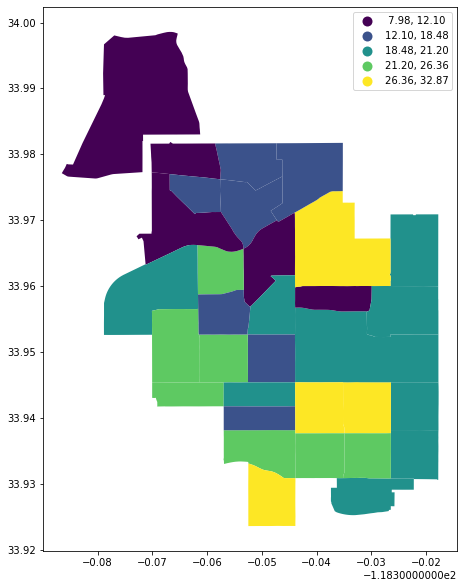

In [66]:
educ.plot(figsize=(12,10),
                 column='Percent Regular High School Diploma',
                 legend=True, 
                 scheme='NaturalBreaks')

When we look at which census tracts withing the city of Inglewood has the highest concentration of people with a traditional high school dimploma, the yellow represents the places with the most. This is different however, to looking at overall educational attainment levels. All this is telling us is the amount of people with a high school dimploma, not anything less or anything more - it is not considering other data or columns other than this.

<AxesSubplot:>

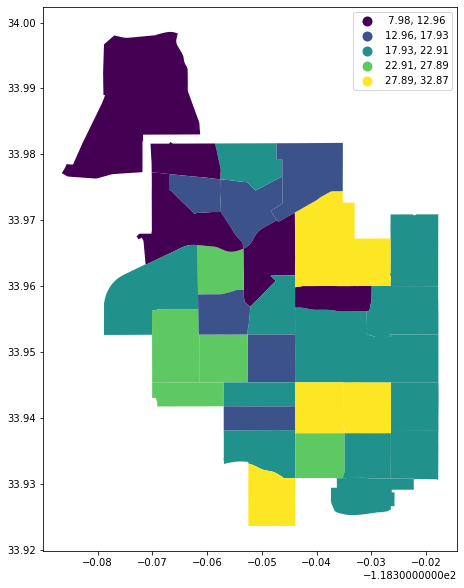

In [67]:
educ.plot(figsize=(12,10),
                 column='Percent Regular High School Diploma',
                 legend=True, 
                 scheme='equal_interval')

In [68]:
# this one shows the same, we just chanmged the scheme to equal intervals.

# Let's get fancier with our data visualization skills.

Text(0.5, 1.0, 'Percent Bachelors Degree')

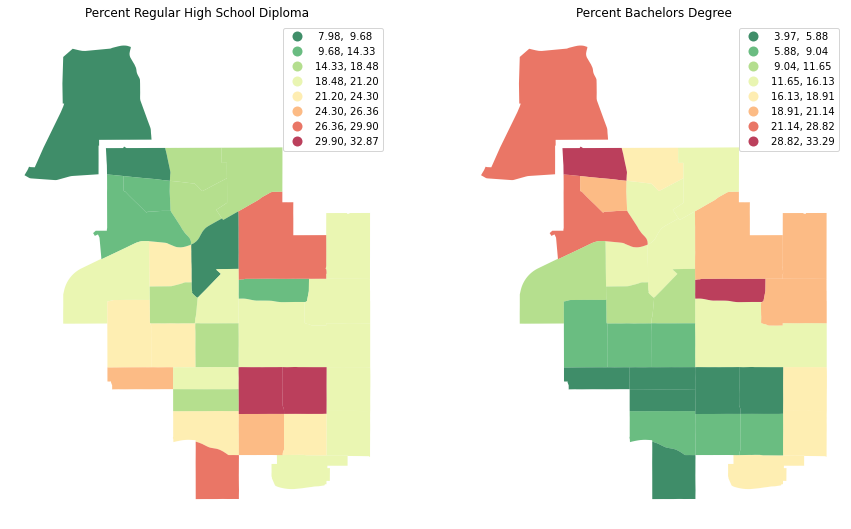

In [69]:
# create the 1x2 subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 12))

# name each subplot
ax1, ax2 = axs

# percent hispanic map on the left
educ.plot(column='Percent Regular High School Diploma', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=8, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax1, # this assigns the map to the subplot,
            legend=True
           )

ax1.axis("off")
ax1.set_title("Percent Regular High School Diploma")

# percent black map on the right
educ.plot(column='Percent Bachelors Degree', 
            cmap='RdYlGn_r', 
            scheme='NaturalBreaks',
            k=8, 
            edgecolor='white', 
            linewidth=0., 
            alpha=0.75, 
            ax=ax2, # this assigns the map to the subplot
            legend=True
           )

ax2.axis("off")
ax2.set_title("Percent Bachelors Degree")

I have now produced 2 maps side by side to one another. The one on the left shows the city of Inglewoods census tracts and classifies each of them using a color scheme with red and orange being the most populated. Again, in terms of Regular High School Diplomas - this is where respondents who identified with that category most frequently are located.


On the right side - the map uses a similar approach but instead is displaying the data as it correpsonds to the percent of people with a bachelors degree.

In [70]:
# What tract has the most people with a Bachelors Degree?

In [71]:
educ[educ['Percent Bachelors Degree'] > 33]

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry,Percent No Schooling Completed,Percent Nursery School,Percent Kindergarten,Percent 1st Grade,Percent 2nd Grade,Percent 3rd Grade,Percent 4th Grade,Percent 5th Grade,Percent 6th Grade,Percent 7th Grade,Percent 8th Grade,Percent 9th Grade,Percent 10th Grade,Percent 11th Grade,"Percent 12th Grade, No Diploma",Percent Regular High School Diploma,Percent GED or Alternative Credential,"Percent Some College, Less than 1 year","Percent Some College, 1 or more years, No Degree",Percent Associates Degree,Percent Bachelors Degree,Percent Masters Degree,Percent Professional School Degree,Percent Doctorate Degree
5,14000US06037600703,"Census Tract 6007.03, Los Angeles, CA",1421.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,172.0,22.0,76.0,306.0,132.0,473.0,168.0,36.0,18.0,"MULTIPOLYGON (((-118.34392 33.95796, -118.3439...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.985222,0.281492,12.104152,1.548205,5.348346,21.534131,9.289233,33.286418,11.82266,2.533427,1.266714


In [72]:
educ[educ['Percent Bachelors Degree'] > 32.65]

,geoid,name,Total,No Schooling Completed,Nursery School,Kindergarten,1st Grade,2nd Grade,3rd Grade,4th Grade,5th Grade,6th Grade,7th Grade,8th Grade,9th Grade,10th Grade,11th Grade,"12th Grade, No Diploma",Regular High School Diploma,GED or Alternative Credential,"Some College, Less than 1 year","Some College, 1 or more years, No Degree",Associates Degree,Bachelors Degree,Masters Degree,Professional School Degree,Doctorate Degree,geometry,Percent No Schooling Completed,Percent Nursery School,Percent Kindergarten,Percent 1st Grade,Percent 2nd Grade,Percent 3rd Grade,Percent 4th Grade,Percent 5th Grade,Percent 6th Grade,Percent 7th Grade,Percent 8th Grade,Percent 9th Grade,Percent 10th Grade,Percent 11th Grade,"Percent 12th Grade, No Diploma",Percent Regular High School Diploma,Percent GED or Alternative Credential,"Percent Some College, Less than 1 year","Percent Some College, 1 or more years, No Degree",Percent Associates Degree,Percent Bachelors Degree,Percent Masters Degree,Percent Professional School Degree,Percent Doctorate Degree
5,14000US06037600703,"Census Tract 6007.03, Los Angeles, CA",1421.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,4.0,172.0,22.0,76.0,306.0,132.0,473.0,168.0,36.0,18.0,"MULTIPOLYGON (((-118.34392 33.95796, -118.3439...",0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.985222,0.281492,12.104152,1.548205,5.348346,21.534131,9.289233,33.286418,11.822660,2.533427,1.266714
18,14000US06037601301,"Census Tract 6013.01, Los Angeles, CA",1404.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,13.0,0.0,17.0,0.0,6.0,18.0,112.0,23.0,89.0,328.0,118.0,459.0,158.0,21.0,12.0,"MULTIPOLYGON (((-118.37034 33.98164, -118.3701...",1.424501,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.712251,0.925926,0.0,1.210826,0.0,0.427350,1.282051,7.977208,1.638177,6.339031,23.361823,8.404558,32.692308,11.253561,1.495726,0.854701


Tracts on row 5 and 18 are super close - pretty much off by a few decimal places in percent terms. Thats wild.

But if you look at the population it makes sense, they are very similar in overal population size too!

<AxesSubplot:>

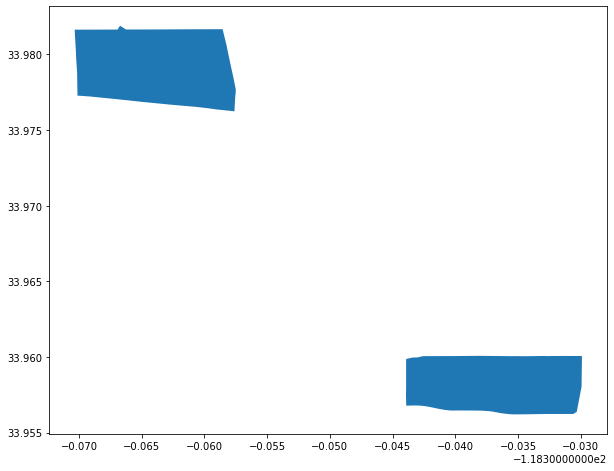

In [73]:
educ[educ['Percent Bachelors Degree'] > 32].plot(figsize=(10,10))

Here they are. This is what they look like! 

Lets put them on an actual map though! This is too hard to visualize. 

# Final Product of Analysis

Add the base map

In [76]:
educ_web_mercator = educ.to_crs(epsg=3857)

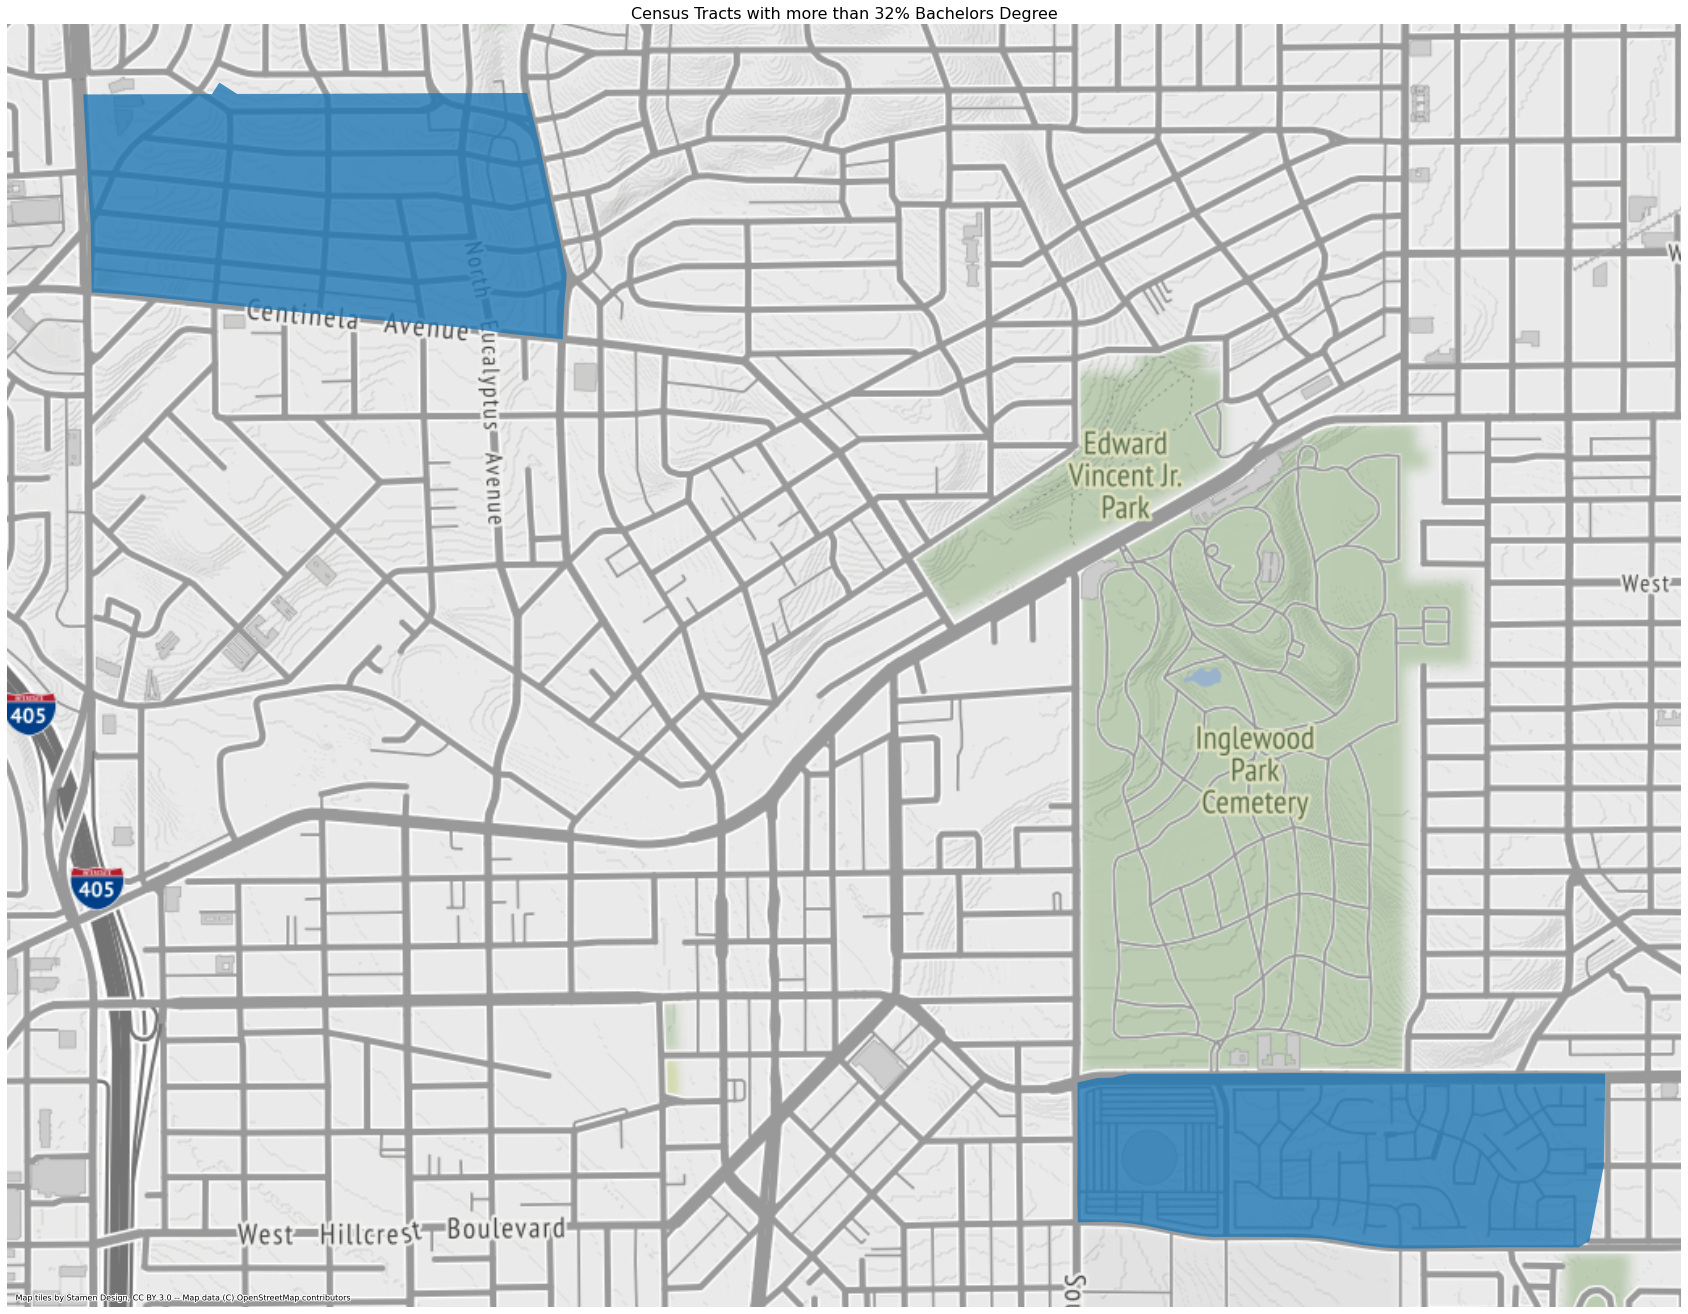

In [77]:
# use subplots that make it easier to create multiple layered maps
fig, ax = plt.subplots(figsize=(30, 30))

# add the layer with ax=ax in the argument 
educ_web_mercator[educ_web_mercator['Percent Bachelors Degree'] > 31].plot(ax=ax, alpha=0.8)

# turn the axis off
ax.axis('off')

# set a title
ax.set_title('Census Tracts with more than 32% Bachelors Degree',fontsize=16)

# add a basemap
ctx.add_basemap(ax)

So here they are on an actual map - the Inglewood census tract with the most concentration of people with a Bachelors Degree.